# AWS Rekognition - Detectando Celebridades em Imagens
Autor: Wagner Brito<br>
Data: 09/01/2025

In [9]:
from pathlib import Path
import boto3
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
from mypy_boto3_rekognition.type_defs import (
    CelebrityTypeDef,
    RecognizeCelebritiesResponseTypeDef,
)

In [3]:
# Funação adaptada da AWS
def reconhecer_celebridades(photo_origem,photo_destino):
    session = boto3.Session(profile_name='wagner-brito')
    client = session.client('rekognition')
    with open(photo_origem, 'rb') as image:
        response = client.recognize_celebrities(Image={'Bytes': image.read()})
    #print(response)
    contagem = len(response['CelebrityFaces'])
    if contagem > 0:
        draw_boxes(photo_origem, photo_destino, response["CelebrityFaces"])
    return contagem

In [12]:
def draw_boxes(image_path: str, output_path: str, face_details: list[CelebrityTypeDef]):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default(size=16)
    #font = ImageFont.truetype("Ubuntu-R.ttf", 20)

    width, height = image.size

    for face in face_details:
        box = face["Face"]["BoundingBox"]  # type: ignore
        left = int(box["Left"] * width)  # type: ignore
        top = int(box["Top"] * height)  # type: ignore
        right = int((box["Left"] + box["Width"]) * width)  # type: ignore
        bottom = int((box["Top"] + box["Height"]) * height)  # type: ignore

        confidence = face.get("MatchConfidence", 0)
        if confidence > 90:
            draw.rectangle([left, top, right, bottom], outline="red", width=3)

            text = face.get("Name", "")
            position = (left, top - 20)
            bbox = draw.textbbox(position, text, font=font)
            draw.rectangle(bbox, fill="red")
            draw.text(position, text, font=font, fill="white")

    image.save(output_path)
    print(f"Imagem salva com resultados em : {output_path}")

In [15]:
def identifica_destaca_celebridade(photo_origem,photo_destino):
    celeb_count = reconhecer_celebridades(photo_origem,photo_destino)
    if celeb_count > 0:
        img = Image.open(photo_destino)
        display(img)

Imagem salva com resultados em : images/resultado.jpg


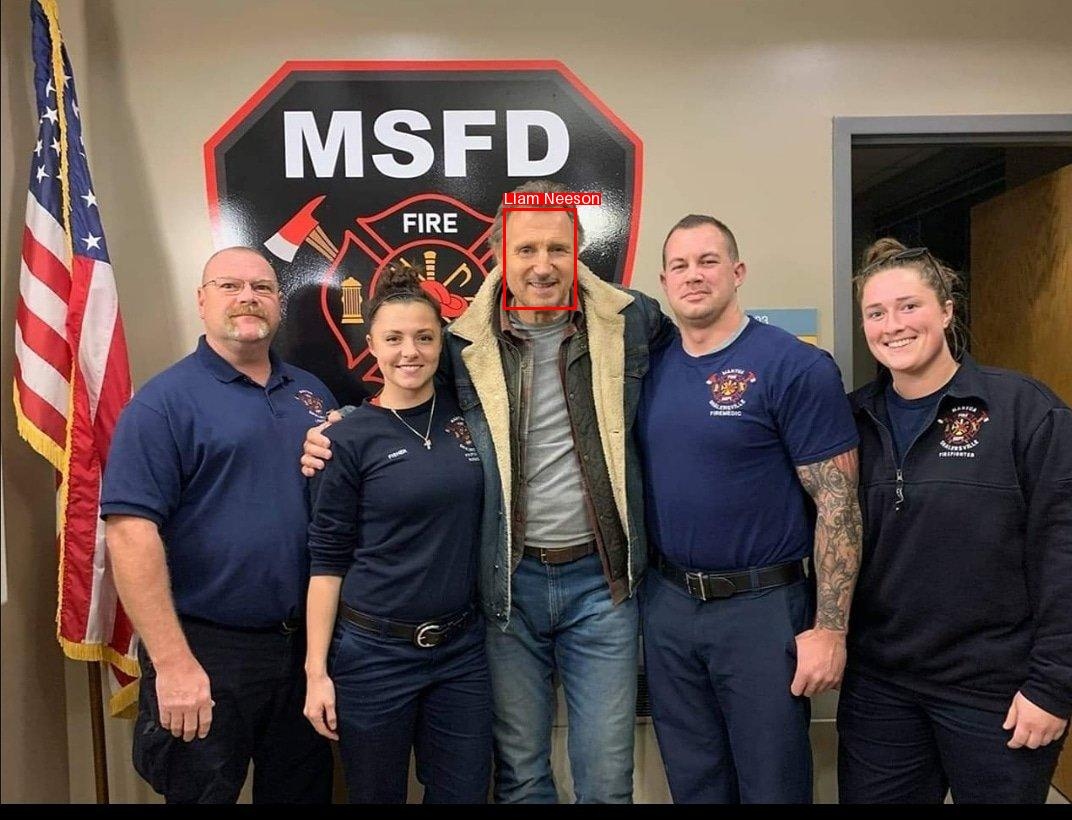

In [16]:
origem = 'images/lian-neeson.jpg'
resultado = 'images/resultado.jpg'
identifica_destaca_celebridade(origem,resultado)

# Conclusão
Aproveitando o código fornecido pela AWS e pelo professor desenvolvi esse notebook para o desafio **AWS Rekognition - Detectando Celebridades em Imagens**.<br>
A foto do Neymar na multidão apresentou um resultado bem estranho mas não tenho, nesse momento, condições de aprimorar o resultado da ferramenta.